# Fraud Detection

## 1. Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from bs4 import BeautifulSoup
import string

In [3]:
df = pd.read_json('data/data.json',convert_dates=True)

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
acct_type,fraudster_event,premium,premium,premium,premium,premium,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800,1300496400,1297909800,1296709200,1298185200,1297314000
body_length,3852,3499,2601,12347,2417,117,28,974,4388,974
channels,5,0,8,6,11,6,5,12,4,12
country,US,US,US,IE,US,US,US,US,US,US
currency,USD,USD,USD,EUR,USD,USD,USD,USD,USD,USD
delivery_method,0,1,1,1,0,0,1,0,0,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...,<p>Come join the Bluegrass Stallions as they t...,<p> </p>\r\n<p> </p>\r\n<p> </p>,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,"<p style=""text-align: center;""><font face=""boo...",<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org,bluegrassstallions.com,naboe.org,themagnetictheatre.org,credosf.com,themagnetictheatre.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666,1294421810,1294425018,1294427837,1294428122,1294428286


In [5]:
df.shape

(14337, 44)

In [6]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

## 2. Feature Engineering

In [8]:
df['fraud?'] = df["acct_type"].apply(lambda x: "fraud" in x)

In [9]:
df['fraud?'].sum()/df.shape[0]

0.09018623142916929

In [10]:
df['payout_type'].value_counts()

ACH      10666
CHECK     3178
           493
Name: payout_type, dtype: int64

In [11]:
df['email_domain'].value_counts()

gmail.com                      3097
yahoo.com                       792
hotmail.com                     399
aol.com                         198
live.com                         80
me.com                           75
ymail.com                        68
comcast.net                      60
generalassemb.ly                 58
yahoo.co.uk                      52
kineticevents.com                52
hotmail.co.uk                    48
improvboston.com                 46
sippingnpainting.com             39
claytonislandtours.com           37
racetonowhere.com                35
lidf.co.uk                       35
live.fr                          33
greatworldadventures.com         31
yahoo.ca                         31
shaw.ca                          28
sbcglobal.net                    26
mac.com                          25
msn.com                          25
guardian.co.uk                   24
live.co.uk                       24
rocketmail.com                   23
joonbug.com                 

In [12]:
df["email_gmail"] = (df['email_domain'] == 'gmail.com')*1

In [13]:
df['email_org'] = df['email_domain'].apply(lambda x: "org" in x)*1

In [14]:
df['email_common'] = (df['email_domain'].apply(lambda x: "gmail" in x or "hotmail" in x or "yahoo" in x or "live.com" in x ))*1

In [15]:
pd.get_dummies(df['payout_type'])

,,ACH,CHECK
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
5,0,0,1
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [16]:
def extract(x):
        cost = []
        for i in x:
            if 'quantity_sold' in i.keys():
                cost.append((i['cost'],i['quantity_sold'],i['quantity_total']))
            else:
                cost.append((i['cost'],0,i['quantity_total']))
        return cost
df['cost_sold_total'] = df['ticket_types'].map(extract)

In [17]:
def extract_payout(x):
        cost = []
        for i in x:
            if 'amount' in i.keys():
                cost.append((i['amount'],i['country']))#,i['created'], i['event'],i['name'],i['uid'],i['zip_code']
            else:
                cost.append(('N/A', i['country']))
        return cost
df['payout_info'] = df['previous_payouts'].map(extract_payout)


In [18]:
df['payout_info'][1]

[(34389.38, 'US'),
 (764.93, 'US'),
 (17405.26, 'US'),
 (2224.16, 'US'),
 (5370.58, 'US'),
 (81511.89, 'US'),
 (86855.8, 'US'),
 (3095.08, 'US'),
 (40833.14, 'US'),
 (25751.65, 'US'),
 (261.89, 'US'),
 (32.5, 'US'),
 (2318.73, 'US'),
 (21481.32, 'US'),
 (16142.47, 'US'),
 (132.04, 'US'),
 (793.81, 'US'),
 (113.0, 'US'),
 (7032.66, 'US'),
 (1876.73, 'US'),
 (146.13, 'US'),
 (263.93, 'US'),
 (5425.92, 'US'),
 (5848.27, 'US'),
 (3984.25, 'US'),
 (29683.73, 'US'),
 (10379.33, 'US'),
 (31.07, 'US'),
 (43465.59, 'US'),
 (16894.06, 'US'),
 (46518.9, 'US'),
 (35955.38, 'US'),
 (2537.13, 'US'),
 (14565.88, 'US'),
 (71314.81, 'US'),
 (37586.56, 'US'),
 (18560.8, 'US'),
 (4965.98, 'US'),
 (2029.86, 'US'),
 (28205.81, 'US'),
 (14120.8, 'US'),
 (4242.5, 'US'),
 (4832.31, 'US'),
 (37.26, 'US'),
 (4361.34, 'US'),
 (664.72, 'US'),
 (28941.9, 'US'),
 (14657.28, 'US'),
 (4715.34, 'US')]

In [19]:
def payout_amount(x):
    payouts=0
    for i in x:
        amount,_ = i
        payouts += amount
    return payouts

In [20]:
df['previous_payout_total'] = df['payout_info'].apply(payout_amount)

In [21]:
def max_amount(x):
    total_amount=0
    for i in x:
        amount,_,tosell = i
        total_amount += amount * tosell
    return total_amount

In [22]:
def total_amount(x):
    total_amount=0
    for i in x:
        amount,sold,_ = i
        total_amount += amount * sold
    return total_amount

In [23]:
df['sold_amount'] = df['cost_sold_total'].map(total_amount)

In [24]:
df['max_sales'] = df['cost_sold_total'].map(max_amount)

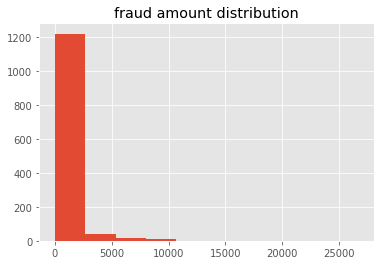

In [30]:
df[df["fraud?"] == True]['sold_amount'].hist();
plt.title("fraud amount distribution");

In [38]:
time_cols = ["user_created","approx_payout_date",'event_created', 'event_end', 'event_published', 'event_start',"user_created"]

In [39]:
for c in time_cols:
    df[c] = pd.to_datetime(df[c],unit='s')

In [40]:
hard_date = pd.datetime(2015,1,1)

In [41]:
hard_date

datetime.datetime(2015, 1, 1, 0, 0)

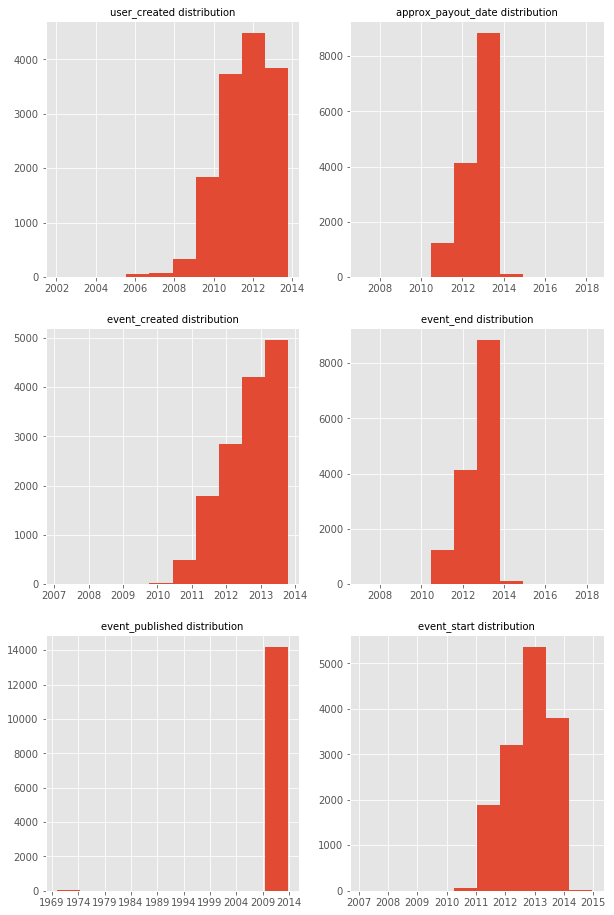

In [42]:
fig,axes = plt.subplots(ncols=2,nrows=3,figsize=(10,16));
axs = axes.ravel()
for c,a in zip(time_cols,axs):
    df[c].hist(ax=a);
    a.set_title("{} distribution".format(c),fontsize=10)

In [52]:
euro_countries = ['AT', 'BE', 'CY', 'EE', 'FI', 'FR', 'DE', 'GR', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PT', 'SK', 'SI', 'ES']

def currency_validity(country, currency):
    if country in euro_countries and currency == 'EUR':
        return 0
    elif country == currency[:2]:
        return 0
    else:
        return 1
            

In [53]:
df['currency_not_c'] = df.country.combine(df.currency,func=currency_validity)

In [55]:
df['currency_not_c'].value_counts()

0    13339
1      998
Name: currency_not_c, dtype: int64

In [44]:
# df['currency_not_c'] = (df['country'] != df['currency'].apply(lambda x: x[:2]))*1

In [56]:
df['user_created_doy'] = df['user_created'].apply(lambda x: x.dayofyear)

In [57]:
df['user_created_date'] = df['user_created'].apply(lambda x: x.date())

In [58]:
df['user_created_hour'] = df['user_created'].apply(lambda x: x.hour)

In [59]:
df['approx_payout_date'] = df['approx_payout_date'].apply(lambda x: x.date())

In [60]:
df['event_published_date'] = df['event_published'].apply(lambda x: x.date())

In [61]:
df['payout_publish'] = (df['approx_payout_date'] - df['event_published_date'])/np.timedelta64(1, 'D')

In [62]:
df['payout_publish'].value_counts()

28.0       260
7.0        258
36.0       253
29.0       244
35.0       242
6.0        241
27.0       239
45.0       238
33.0       233
22.0       229
31.0       221
46.0       221
21.0       216
32.0       214
20.0       213
10.0       208
30.0       208
19.0       205
25.0       201
24.0       198
23.0       198
13.0       197
16.0       196
8.0        195
38.0       194
26.0       192
42.0       190
37.0       190
14.0       188
9.0        185
          ... 
15431.0      1
390.0        1
15984.0      1
644.0        1
376.0        1
207.0        1
372.0        1
985.0        1
395.0        1
797.0        1
258.0        1
223.0        1
413.0        1
387.0        1
345.0        1
544.0        1
15596.0      1
461.0        1
483.0        1
15086.0      1
527.0        1
15867.0      1
317.0        1
597.0        1
510.0        1
309.0        1
15987.0      1
15730.0      1
476.0        1
455.0        1
Name: payout_publish, Length: 439, dtype: int64

In [63]:
df['same_day_publish'] = (df['user_created_date'] == df['event_published_date'])*1

In [64]:
df.same_day_publish.value_counts()

0    12473
1     1864
Name: same_day_publish, dtype: int64

In [65]:
df['event_start_date'] = df['event_start'].apply(lambda x: x.date())

In [66]:
df['payout_start'] = (df['approx_payout_date'] - df['event_start_date'])/np.timedelta64(1, 'D')

In [67]:
df['user_age_lg'] = df['user_age'].apply(lambda x: np.log(x+1))

In [83]:
df['missing_desc'] = (df['description']== '')*1

In [95]:
df['missing_country'] = (df['country'] == '')*1

In [97]:
df[df['missing_country'] == 1][['acct_type', 'country', 'missing_country']] 

,acct_type,country,missing_country
54,fraudster,,1
163,premium,,1
203,premium,,1
242,premium,,1
273,premium,,1
290,premium,,1
308,premium,,1
315,premium,,1
350,premium,,1
364,fraudster_event,,1


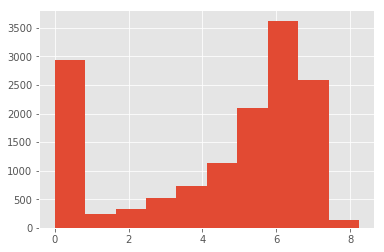

In [68]:
df['user_age_lg'].hist();

In [69]:
df['org_facebook_lg'] = df['org_facebook'].apply(lambda x: np.log(x+1))

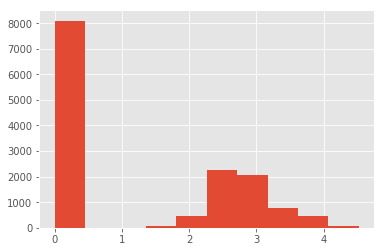

In [70]:
df['org_facebook_lg'].hist();

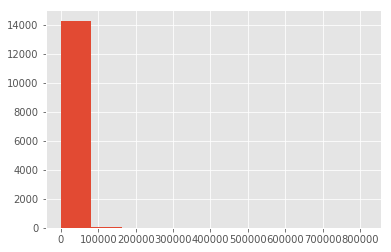

In [71]:
df.sold_amount.hist(); #outliers

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


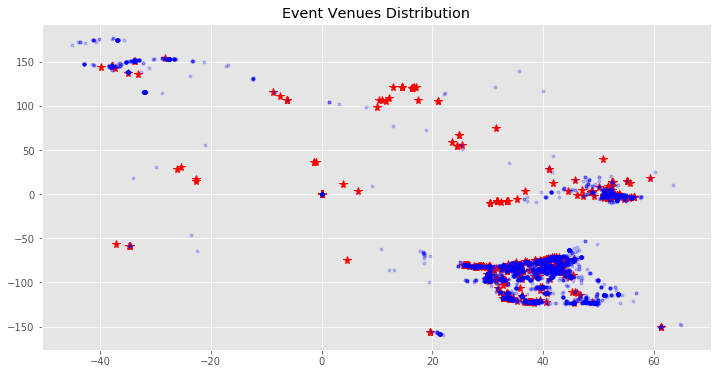

In [73]:
plt.figure(figsize = (12,6))
plt.plot(df[df['fraud?']].venue_latitude, df[df['fraud?']].venue_longitude, '* ', ms=0.5,color='r',markersize=8);
plt.plot(df[~df['fraud?']].venue_latitude, df[~df['fraud?']].venue_longitude, '.', ms=0.5,color='b',alpha=0.2,markersize=6);
# plt.xlim(20,60)
# plt.ylim(-150,50)
plt.title('Event Venues Distribution');

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


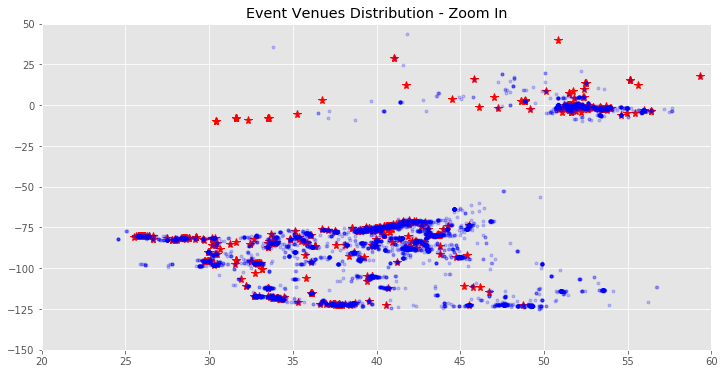

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df[df['fraud?']].venue_latitude, df[df['fraud?']].venue_longitude, '* ', ms=0.5,color='r',markersize=8);
plt.plot(df[~df['fraud?']].venue_latitude, df[~df['fraud?']].venue_longitude, '.', ms=0.5,color='b',alpha=0.2,markersize=6);
plt.xlim(20,60)
plt.ylim(-150,50)
plt.title('Event Venues Distribution - Zoom In');

In [98]:
np.abs(df.corr()['fraud?']).sort_values(ascending=False)

fraud?                   1.000000
same_day_publish         0.352516
user_age_lg              0.349353
missing_desc             0.266270
email_common             0.234114
org_facebook_lg          0.230832
user_age                 0.215929
user_type                0.213911
org_twitter              0.205692
delivery_method          0.194046
org_facebook             0.181792
sale_duration2           0.179550
sale_duration            0.179512
has_logo                 0.169485
channels                 0.165358
name_length              0.158447
email_org                0.131007
body_length              0.118308
fb_published             0.099143
has_analytics            0.084626
num_payouts              0.083433
has_header               0.082101
num_order                0.078008
show_map                 0.076217
payout_publish           0.067935
venue_longitude          0.066057
previous_payout_total    0.054147
sold_amount              0.052393
user_created_hour        0.044157
email_gmail   

In [100]:
min_features = list(np.abs(df.corr()['fraud?']).sort_values(ascending=False)[1:12].index)
min_features

['same_day_publish',
 'user_age_lg',
 'missing_desc',
 'email_common',
 'org_facebook_lg',
 'user_age',
 'user_type',
 'org_twitter',
 'delivery_method',
 'org_facebook',
 'sale_duration2']

In [101]:
min_features = ['same_day_publish',
 'user_age_lg',
 'missing_desc',
 'email_common',
 'org_facebook_lg',
 'user_age',
 'user_type',
 'org_twitter',
 'delivery_method',
 'org_facebook',
 'sale_duration2']


In [102]:
mindf = df[min_features]

In [103]:
mindf.head(4)

,same_day_publish,user_age_lg,missing_desc,email_common,org_facebook_lg,user_age,user_type,org_twitter,delivery_method,org_facebook,sale_duration2
0,0,3.610918,0,1,0.0,36,1,0.0,0.0,0.0,33
1,0,5.010635,0,0,0.0,149,3,12.0,1.0,0.0,28
2,0,5.370638,0,0,0.0,214,3,0.0,1.0,0.0,54
3,0,6.791221,0,0,0.0,889,3,0.0,1.0,0.0,0


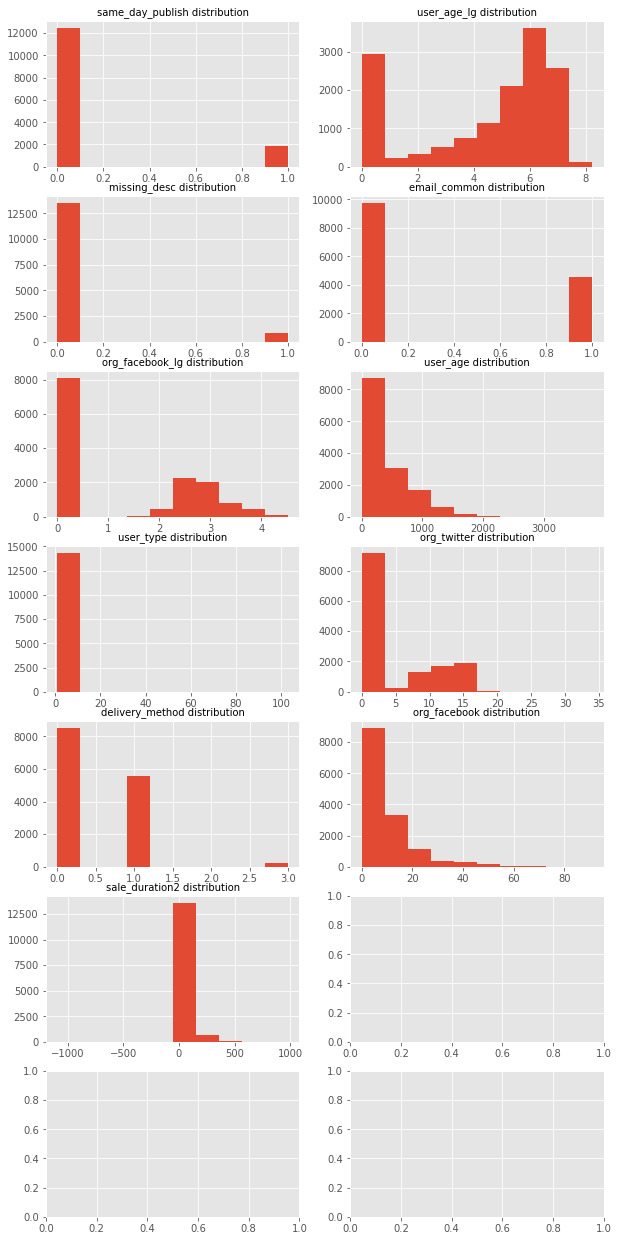

In [104]:
fig,axes = plt.subplots(ncols=2,nrows=7,figsize=(10,22));
axs = axes.ravel()
for c,a in zip(list(mindf.columns),axs):
    mindf[c].hist(ax=a);
    a.set_title("{} distribution".format(c),fontsize=10)

In [105]:
mindf.isnull().sum()

same_day_publish     0
user_age_lg          0
missing_desc         0
email_common         0
org_facebook_lg     59
user_age             0
user_type            0
org_twitter         59
delivery_method     16
org_facebook        59
sale_duration2       0
dtype: int64

In [106]:
mindf = mindf.fillna(0)

## 2. Modeling
### 2.1 Logistic Regression

In [107]:
from sklearn import linear_model

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [110]:
y = df['fraud?']*1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(mindf, y ,test_size=0.2,random_state=17)

In [112]:
lg = linear_model.LogisticRegression(C=0.5,penalty='l2')

In [113]:
model = lg.fit(X_train,y_train)

In [114]:
y_hat_test = model.predict(X_test)

In [115]:
accuracy_score(y_test,y_hat_test)

0.9323570432357043

In [116]:
precision_score(y_test,y_hat_test)

0.7051282051282052

In [117]:
recall_score(y_test,y_hat_test)

0.4263565891472868

Model 1 result:

low recall, good formance on precision and accuracy
?we are precise on the predictions we made, however we are missing a lot of actual frauds, that we didn't predict as fraud 

In [118]:
import itertools

In [119]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
cm = confusion_matrix(y_hat_test,y_test)

Confusion matrix, without normalization
[[2564  148]
 [  46  110]]


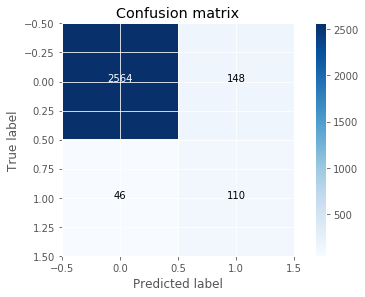

In [121]:
plot_confusion_matrix(cm)

In [122]:
roc_curve(y_test,y_hat_test)

(array([0.        , 0.01762452, 1.        ]),
 array([0.        , 0.42635659, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [125]:
mindf['highrisk'] = model.predict_proba(X_test) >0.8

ValueError: Length of values does not match length of index

In [111]:
[TP,FP],[FN,TN] = confusion_matrix(y_test,y_hat_test)

In [116]:
sns.heatmap(confusion_matrix(y_test,y_hat_test),cmap='')

ValueError: Colormap orange is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [126]:
confusion_matrix(y_test,y_hat_test)

array([[2564,   46],
       [ 148,  110]])

In [273]:
test = pd.read_json('newdata.json')

In [274]:
from pandas.io.json import json_normalize

In [247]:
# pd.DataFrame.from_dict(test.data,orient='columns')

,data
0,"{'body_length': 2281, 'channels': 11, 'country..."


In [275]:
test = json_normalize(list(test['data']))

In [253]:
test

,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,2281,11,US,USD,0.0,<p>Have you lost a loved one unnecessarily to ...,gmail.com,1368573263,1373832000,1.368642e+09,...,"[{'event_id': 6681801, 'cost': 0.0, 'availabil...",1,1368511248,3,2397 Patterson Road,US,42.618669,-85.543951,"Gun Lake Park, MI",MI


In [276]:
def feature_engineer(df):
    #2. convert time columns into datetime format
    time_cols = ["user_created",'event_created', 'event_end', 'event_published', 'event_start',"user_created"]
    #"approx_payout_date" - not in live data
    for c in time_cols:
        df[c] = pd.to_datetime(df[c],unit='s')

    #create new feature - cost,quantity_sold,quantity_total
    def extract(x):
        cost = []
        for i in x:
            if 'quantity_sold' in i.keys():
                cost.append((i['cost'],i['quantity_sold'],i['quantity_total']))
            else:
                cost.append((i['cost'],0,i['quantity_total']))
        return cost
    df['cost_sold_total'] = df['ticket_types'].map(extract)

    #create new feature - total sold amount, max sales
    def total_amount(x):
        total_amount=0
        for i in x:
            amount,sold,_ = i
            total_amount += amount * sold
        return total_amount
    df['sold_amount'] = df['cost_sold_total'].map(total_amount)
    
    def max_amount(x):
        total_amount=0
        for i in x:
            amount,_,tosell = i
            total_amount += amount * tosell
    return total_amount
    df['max_sales'] = df['cost_sold_total'].map(max_amount)



    min_features = ['user_age','user_type', 'org_twitter', 'delivery_method', 'org_facebook',  'sale_duration', 'has_logo', 'channels', 'name_length', 'body_length']
    #'sale_duration2' - not in live data
    mindf = df[min_features]
    mindf = mindf.fillna(0)
    return mindf


In [277]:
testdf = feature_engineer(test)

In [164]:
testdf

,user_age,user_type,org_twitter,delivery_method,org_facebook,sale_duration,has_logo,channels,name_length,body_length
0,625,1,16.0,0.0,0.0,55.0,1,11,37,3954


In [278]:
prob = pd.read_csv('prediction.csv',header=None,names=['probability'])

In [279]:
p = prob.probability

In [347]:
p

0    0.00094
Name: probability, dtype: float64

In [280]:
test['probability'] = p

In [355]:
if p[0] > 0.8:
    test['label'] = 'high risk'
elif p[0] <= 0.8 and p[0] >0.6:
    test['label'] = 'middle risk'
elif p[0] <= 0.6 and p[0] >=0.5:
    test['label'] = 'low risk'

In [354]:
test["label"]

KeyError: 'label'

In [288]:
"{:10.3f}".format(test['probability'][0]*100).strip()

'0.094'

In [190]:
test.org_name

0    
Name: org_name, dtype: object

In [176]:
test.name

0    Couture Conscience Presents Chapter 3
Name: name, dtype: object

In [163]:
model.predict_proba(testdf)

ValueError: X has 10 features per sample; expecting 11

In [45]:
#Step 1. Load the data
descriptions = df['description']

#Step 2. Vectorize, Stem and Lemmatize words

# vect = CountVectorizer(stop_words='english')
# model = vect.fit_transform(docs)

snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

def tokenize(doc):
    soup = BeautifulSoup(doc,'html.parser')
    text = soup.get_text()
    translater = str.maketrans('','',string.punctuation)
    a = [wordnet.lemmatize(word) for word in word_tokenize(text.lower().translate(translater))]
    return a

vect = TfidfVectorizer(stop_words='english', analyzer='word',tokenizer=tokenize)
model = vect.fit_transform(descriptions)

In [46]:
features = vect.get_feature_names()

In [52]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [51]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenize>,
 'use_idf': True,
 'vocabulary': None}

In [53]:
vect.get_feature_names()

['\x03',
 '\x03\x03accompanied',
 '\x03\x03for',
 '\x03\x03is',
 '\x03\x03trust',
 '\x03and',
 '\x03barbara',
 '\x03don',
 '\x03ervin',
 '\x03interim',
 '\x03jack',
 '\x03louis',
 '\x03marianne',
 '\x03maya',
 '\x03nadia',
 '\x03national',
 '\x03president',
 '\x03significantly',
 '\x03sir',
 '\x03tualatin',
 '\x03will',
 '\x03yogi',
 '\x10\x10\x10parking',
 '0',
 '00',
 '000',
 '0000',
 '000000',
 '0000043',
 '00001194',
 '00001195',
 '00001198',
 '0006',
 '0007',
 '000em',
 '0010mobile',
 '0017029392525',
 '0020',
 '003',
 '0031',
 '00320',
 '00334',
 '005',
 '00500',
 '00557',
 '007',
 '0074',
 '007pm',
 '007themed',
 '0084166',
 '008in',
 '0090005140',
 '0099',
 '00h30',
 '00px',
 '00s',
 '01',
 '0100',
 '0100pm',
 '010120125',
 '0102',
 '01030pm',
 '01072011',
 '01072013',
 '0108',
 '010emfontfamily',
 '011',
 '01105',
 '01122012',
 '0113',
 '0114',
 '0115',
 '011513',
 '01159932350',
 '0116',
 '0117',
 '01200am',
 '012013',
 '01202',
 '0121',
 '01223',
 '0123',
 '01245',
 '0125',


In [58]:
soup = BeautifulSoup(df.description[0],'html.parser')
text = soup.get_text()

In [56]:
text

'\n\xa0\nParty Starz Entertaintment & Diverse International Group Presents...The Official\xa0"99 Hour No Sleep" Super Bowl \nWeekend Grand Finale\nNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!\xa0The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).\nHosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!\nDJ Q & DJ Slym will ber keepig the party jumping til the sun comes 

### Models

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [129]:
def randomForestModel(Xtrain, ytrain, X_test):
    parameters = {'class_weight':['balanced', None],
                'max_depth': [2,4],
                'max_features': ['auto',4,5]
                }
    gscv = GridSearchCV(RandomForestClassifier(), parameters)
    fit = gscv.fit(Xtrain, ytrain)
    print('Best parameters for RF: {}'.format(fit.best_params_))
    predictedRF = fit.predict_proba(X_test)[:,1]
    return predictedRF

In [130]:
parameters = {'class_weight':['balanced', None],
                'max_depth': [2,4],
                'max_features': ['auto',4,5]
                }

In [131]:
gscv = GridSearchCV(RandomForestClassifier(), parameters)

In [132]:
model = gscv.fit(X_train, y_train)

In [133]:
print('Best parameters for RF: {}'.format(fit.best_params_))

Best parameters for RF: {'class_weight': None, 'max_depth': 4, 'max_features': 5}


In [139]:
predictedRF = model.predict_proba(X_test)[:,1]

In [135]:
predictedRF

array([0.09402219, 0.86389611, 0.00966221, ..., 0.00966221, 0.04320621,
       0.01154685])

In [140]:
y_hat_test = model.predict(X_test)

In [141]:
y_hat_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)